In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Conv1D, GlobalAveragePooling1D, GRU
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt
import numpy as np

In [2]:
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

In [3]:
train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [4]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [5]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

? ? ? ? ? ? ? b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any real concern for anything else i cant recommend this film at all '
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of 

In [7]:
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(GRU(units=32)),
    Dense(units=6, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [8]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 670s 843ms/step - loss: 0.6249 - accuracy: 0.5856 - val_loss: 0.3665 - val_accuracy: 0.8322
Epoch 2/10
782/782 [==============================] - 589s 753ms/step - loss: 0.2934 - accuracy: 0.8801 - val_loss: 0.3640 - val_accuracy: 0.8417
Epoch 3/10
782/782 [==============================] - 607s 777ms/step - loss: 0.2154 - accuracy: 0.9189 - val_loss: 0.3765 - val_accuracy: 0.8364
Epoch 4/10
782/782 [==============================] - 646s 827ms/step - loss: 0.1663 - accuracy: 0.9407 - val_loss: 0.4564 - val_accuracy: 0.8240
Epoch 5/10
782/782 [==============================] - 620s 793ms/step - loss: 0.1192 - accuracy: 0.9599 - val_loss: 0.5021 - val_accuracy: 0.8324
Epoch 6/10
782/782 [==============================] - 730s 934ms/step - loss: 0.0863 - accuracy: 0.9717 - val_loss: 0.5984 - val_accuracy: 0.8167
Epoch 7/10
782/782 [==============================] - 736s 941ms/step - loss: 0.0585 - accuracy: 0.9809 - val_loss: 0.6751 -

In [12]:
def plot_metrics(metric_name):
    plt.plot(history.history[metric_name], label=metric_name)
    plt.plot(history.history['val_' + metric_name], label='val_'+metric_name)
    plt.xlabel('Epochs')
    plt.ylabel(metric_name)
    plt.legend([metric_name, 'val_' + metric_name])
    plt.show()

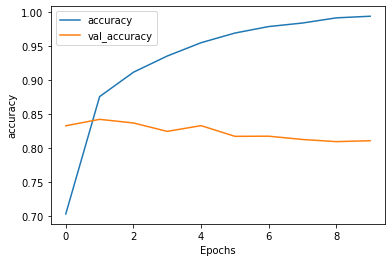

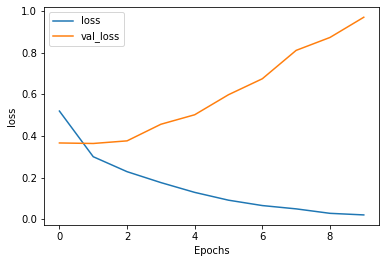

In [13]:
plot_metrics('accuracy')
plot_metrics('loss')

In [ ]:
# Model Definition with Conv1D
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

In [ ]:
# Model Definition with Bi-LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()